# Predictin breast cancer

From: Breast Cancer Wisconsin (Diagnostic) Data Set

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
# reading data into the dataframe
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df['Unnamed: 32'].unique() 


array([nan])

In [8]:
df.dtypes 

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
df.isnull().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df['diagnosis'].value_counts() 

diagnosis
B    357
M    212
Name: count, dtype: int64

# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


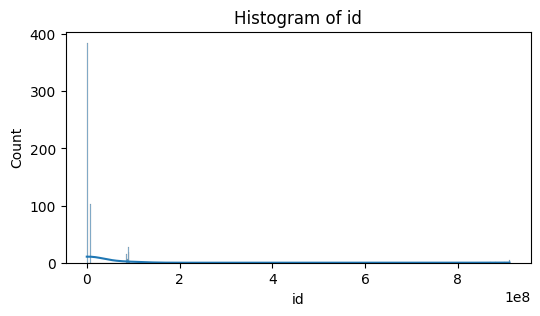

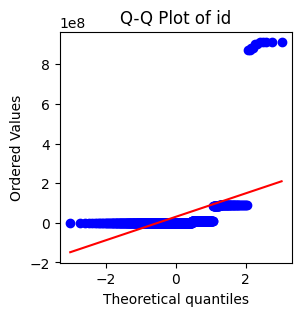

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


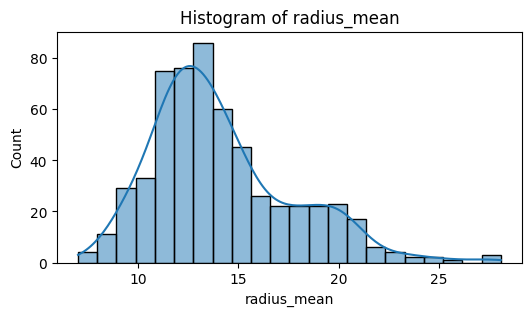

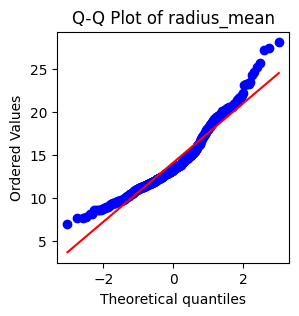

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


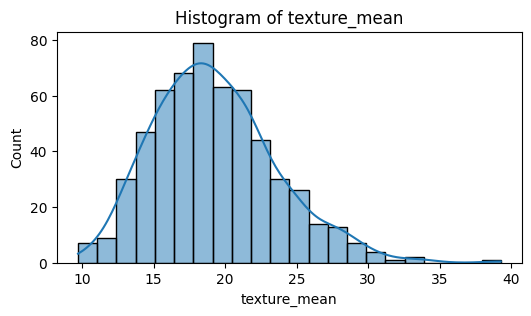

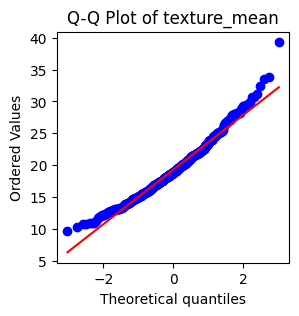

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


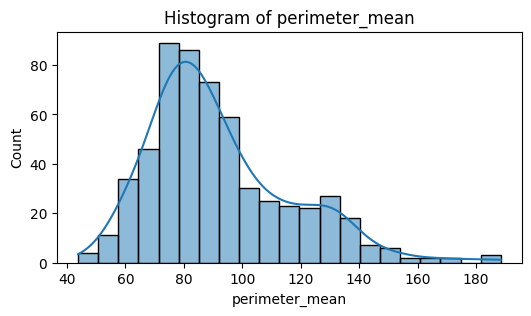

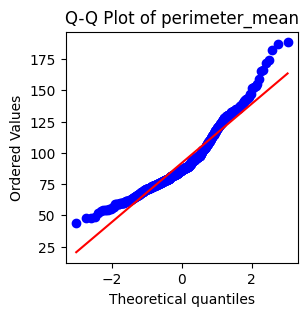

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


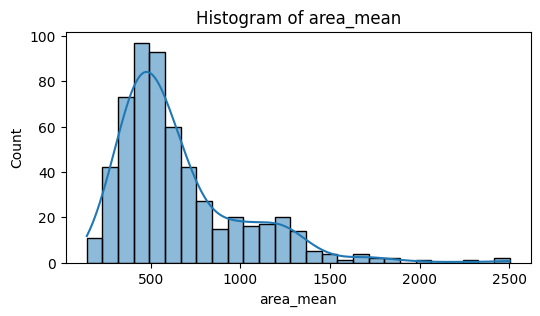

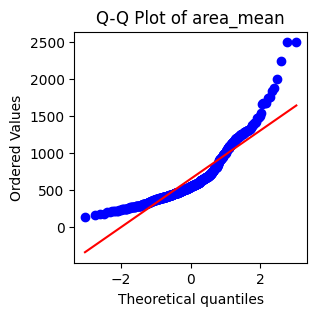

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


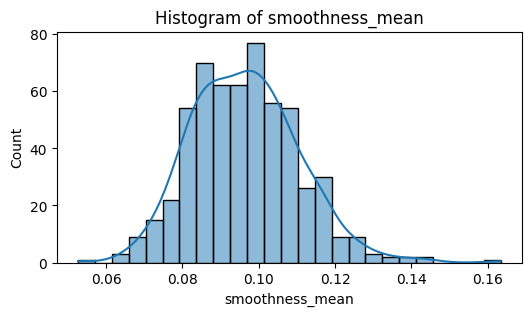

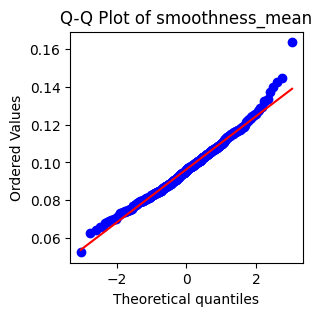

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


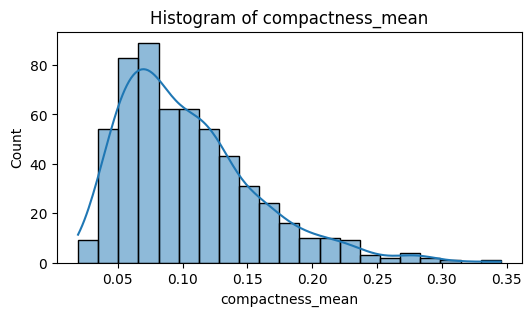

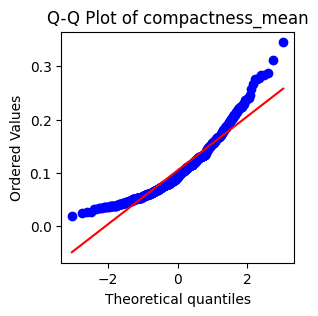

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


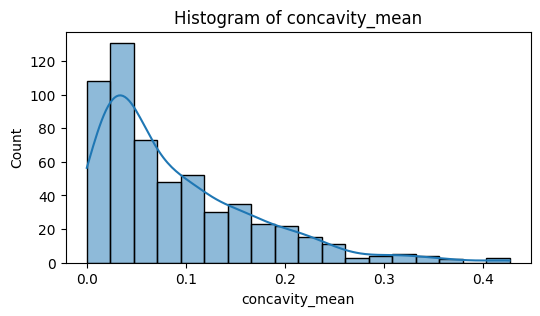

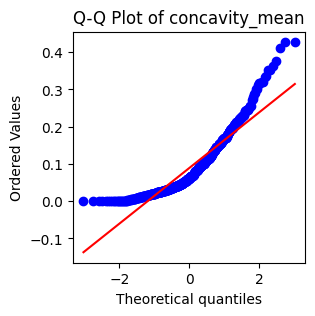

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


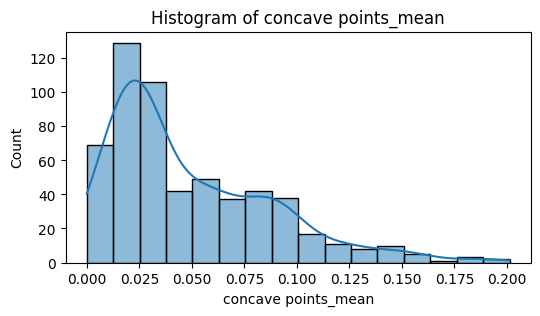

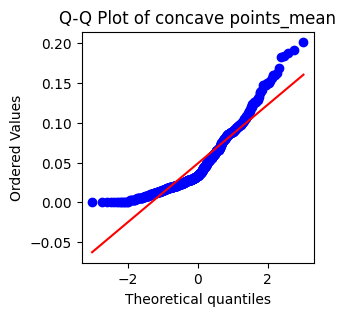

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


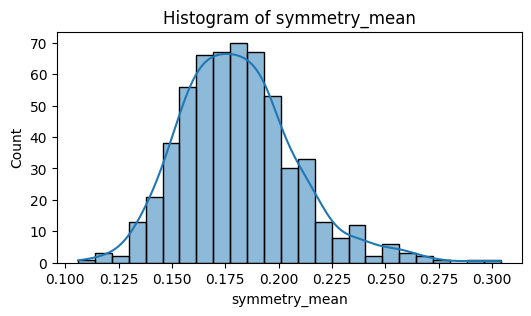

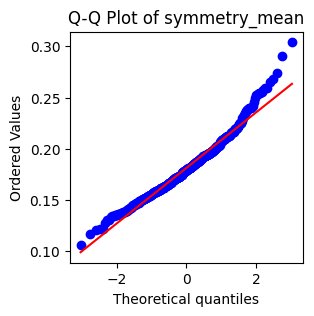

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


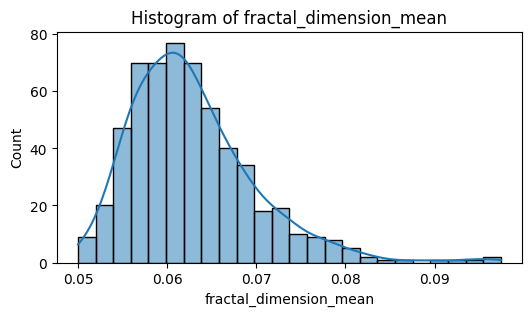

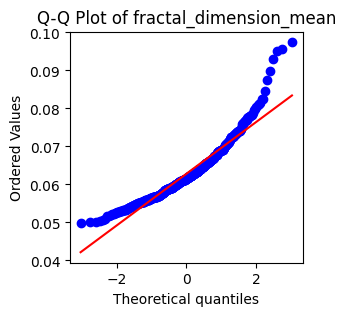

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


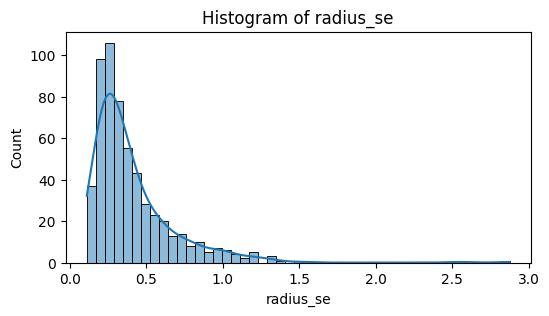

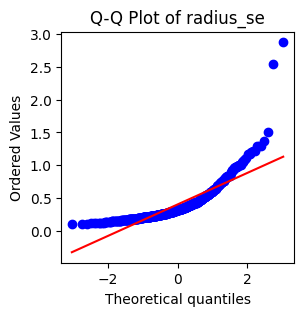

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


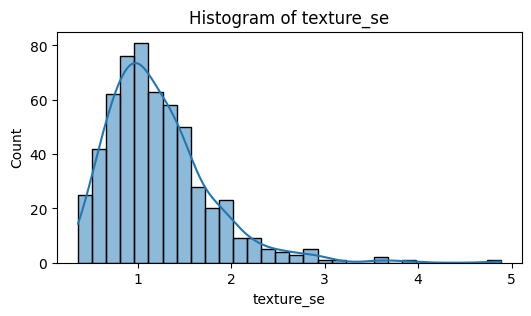

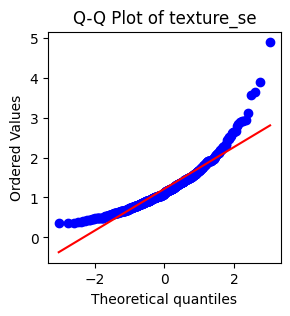

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


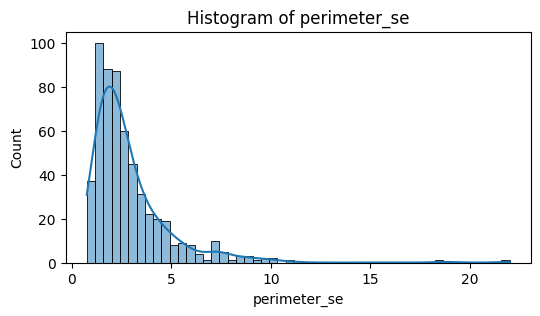

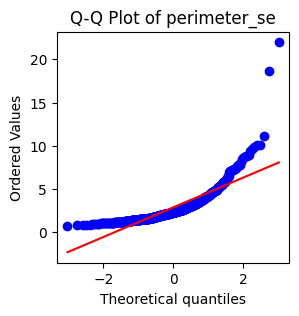

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


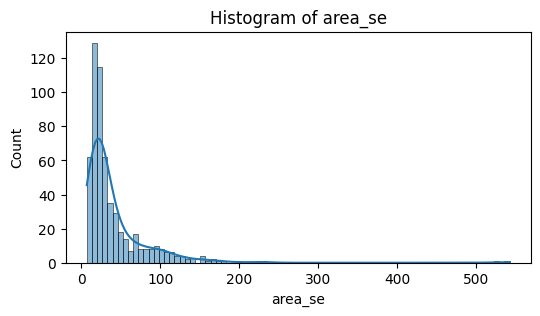

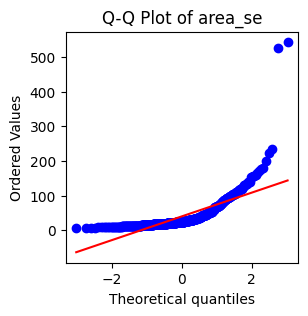

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


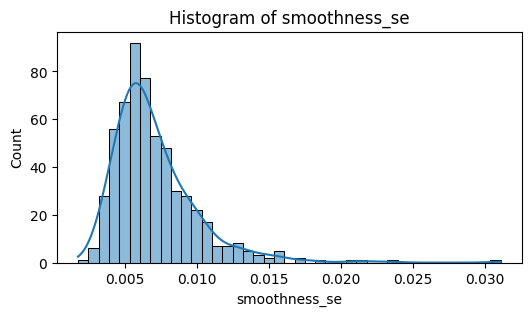

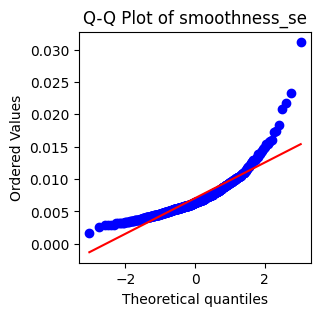

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


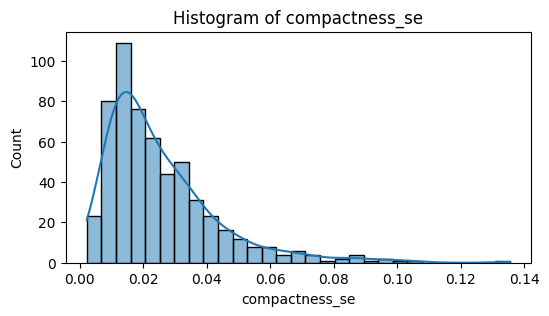

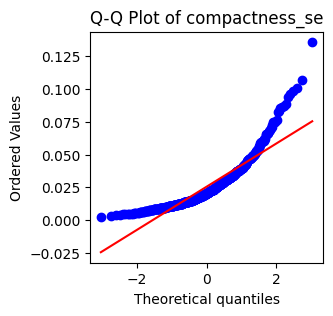

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


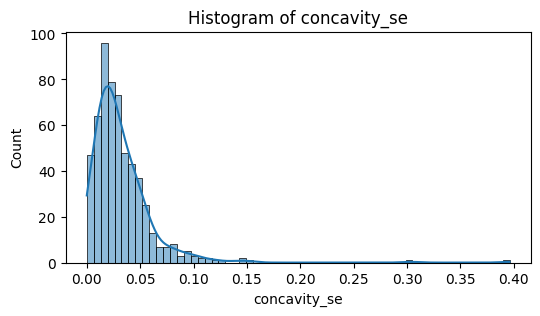

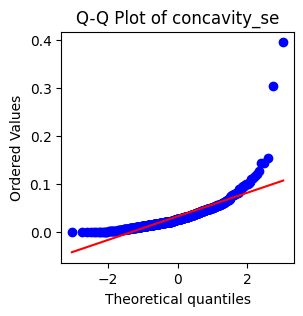

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


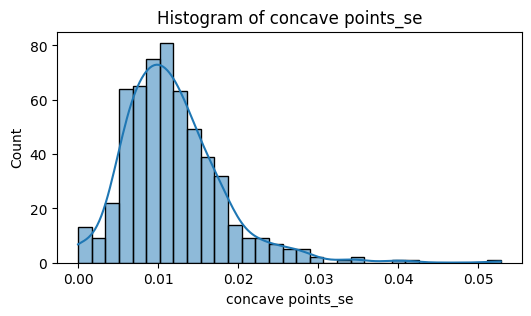

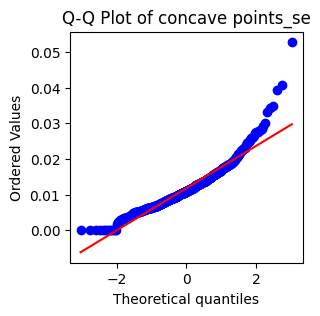

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


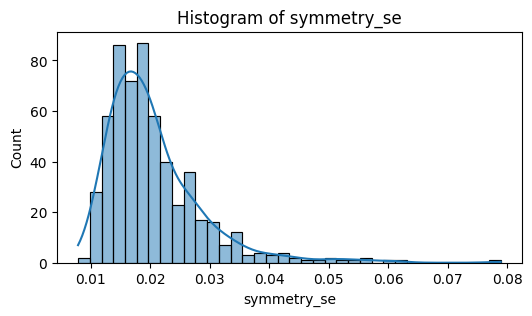

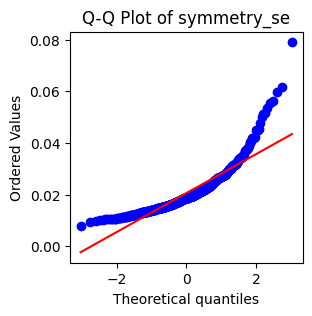

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


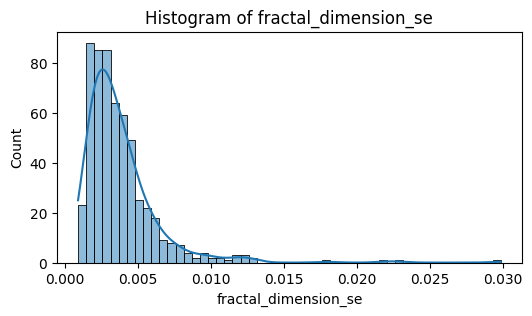

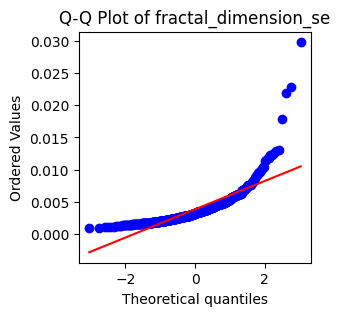

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


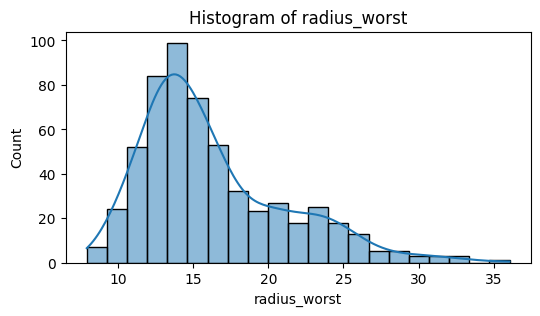

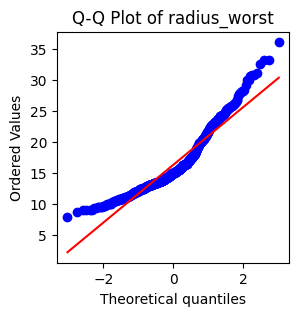

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


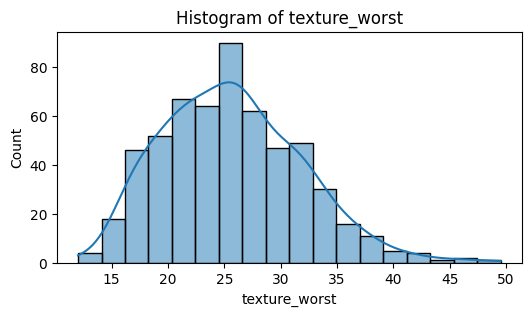

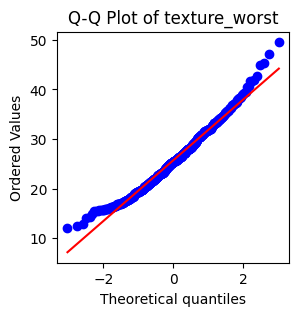

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


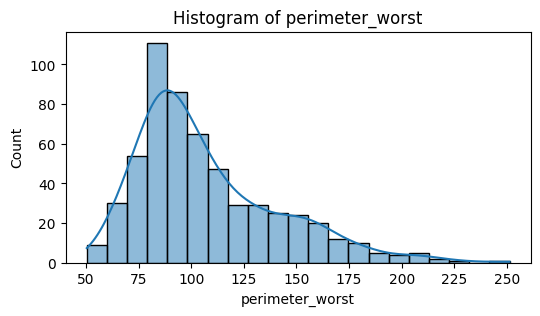

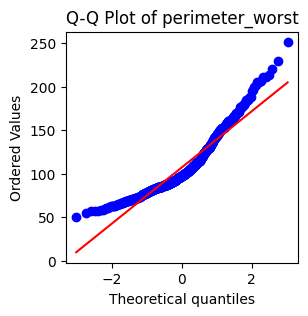

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


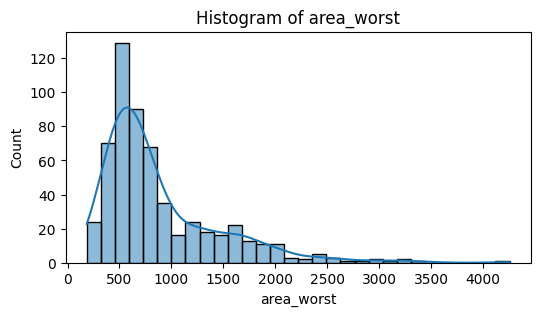

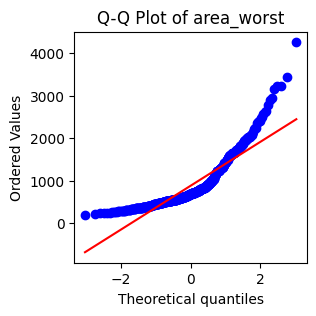

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


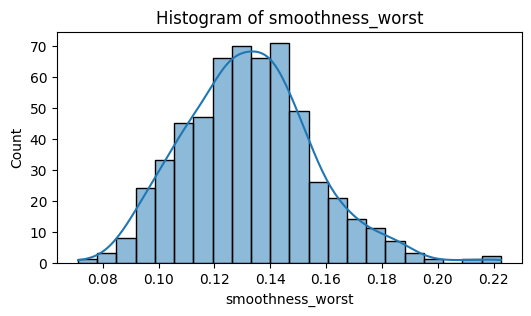

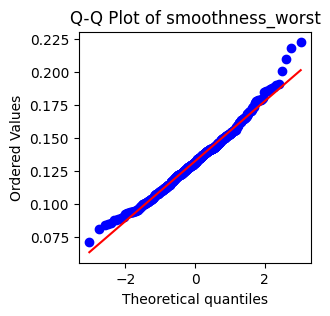

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


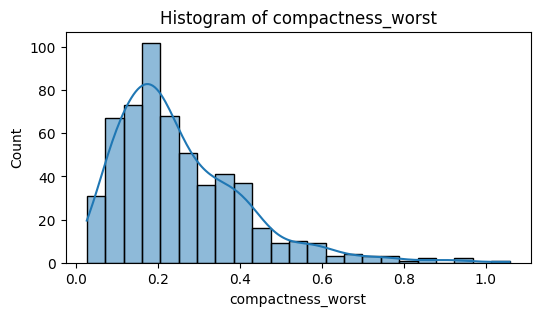

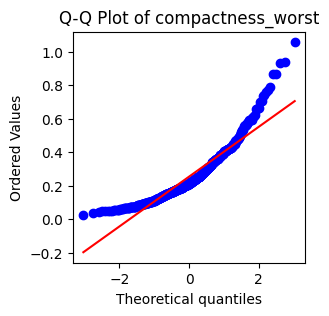

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


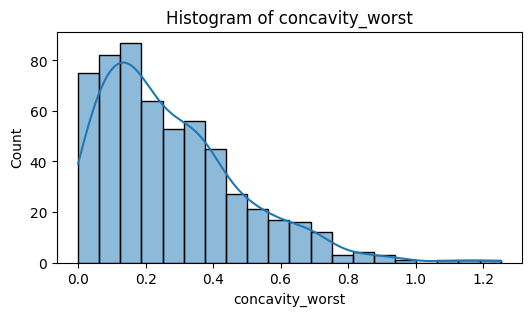

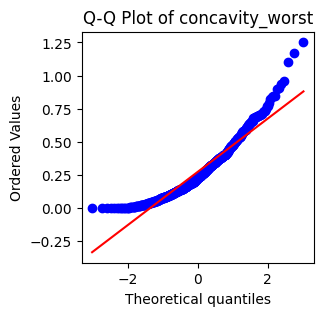

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


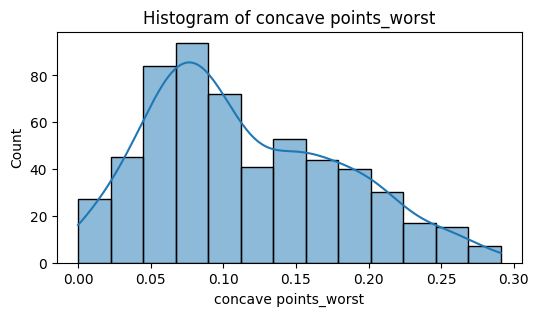

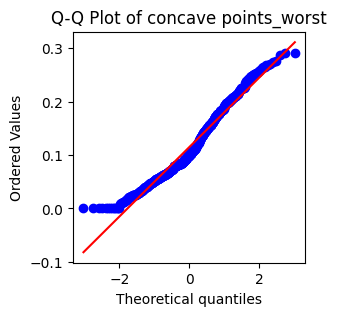

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


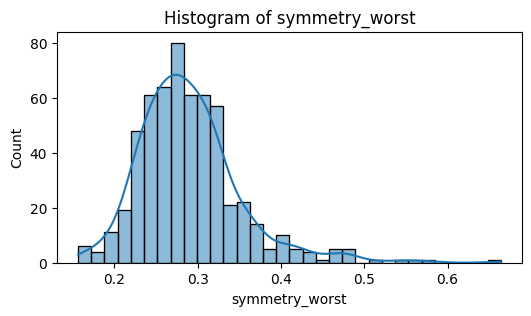

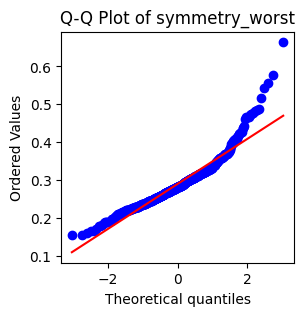

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


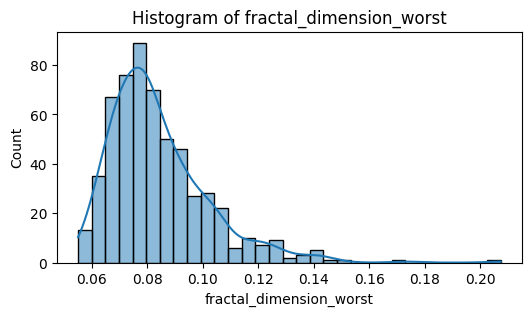

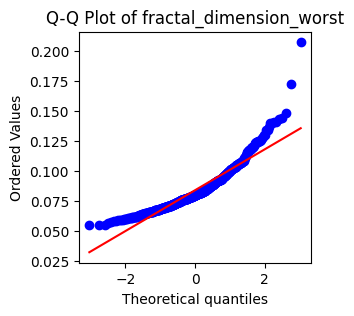

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


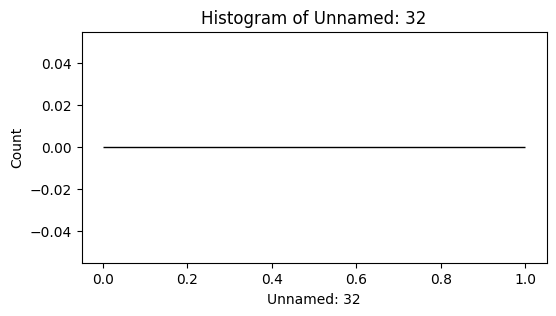

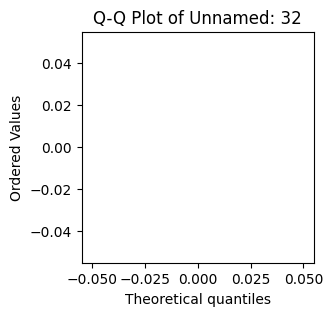

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loop through all numerical columns in the DataFrame
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Plot histogram
    plt.figure(figsize=(6, 3))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()
    
    # Plot Q-Q plot
    plt.figure(figsize=(3, 3))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()


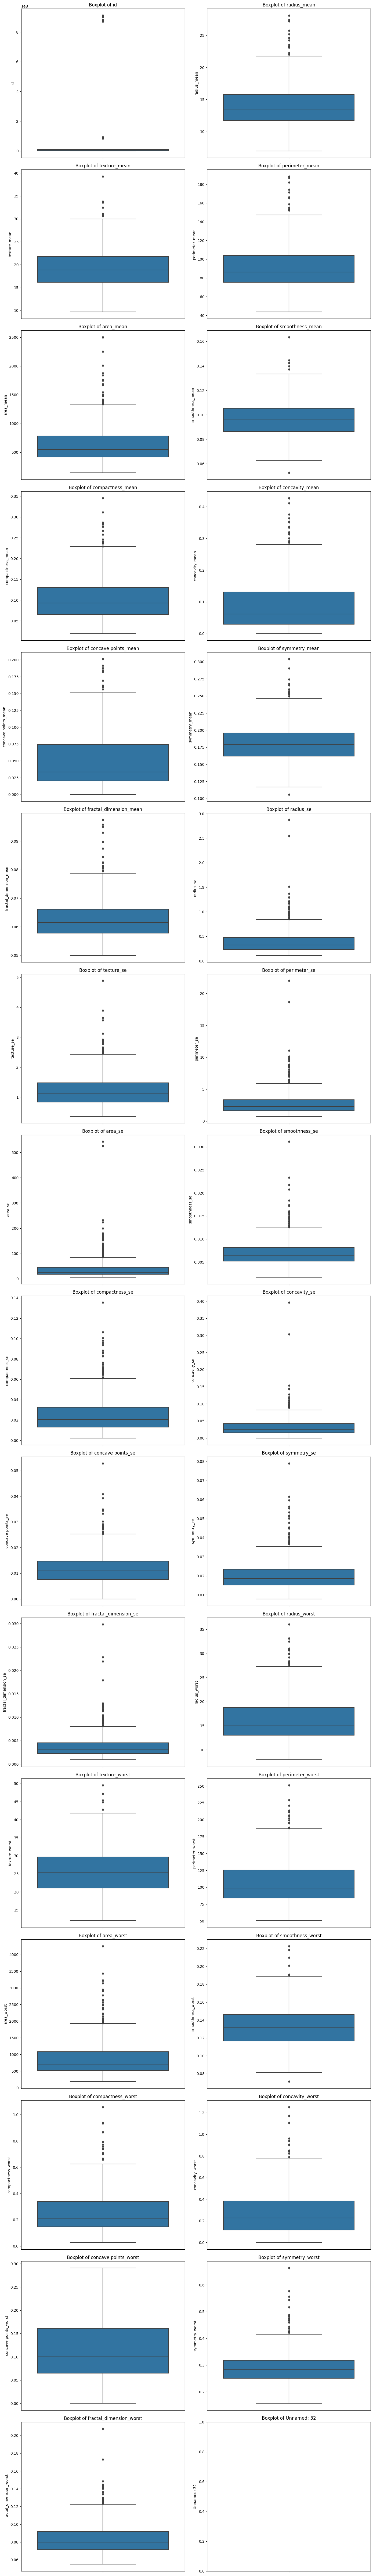

In [12]:
# Select numerical columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the grid
n_cols = 2  # Number of plots per row
n_rows = int(np.ceil(len(num_columns) / n_cols))

# Create a figure and set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))

# Flatten axes array if necessary
axes = axes.flatten()

# Loop through each numerical column and plot boxplot
for i, column in enumerate(num_columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Lets divide the DataFrame based on the values in the diagnosis column into two separate DataFrames: one for 'M' (malignant) cases, called mal, and another for 'B' (benign) cases, called ben

In [13]:
mal = df[df['diagnosis'] == 'M']
ben = df[df['diagnosis'] == 'B']

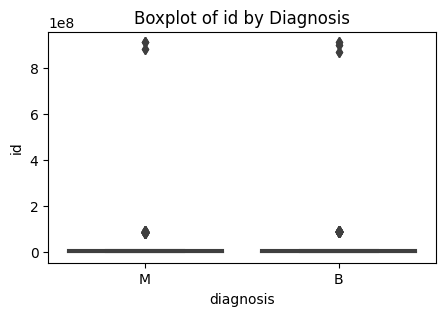

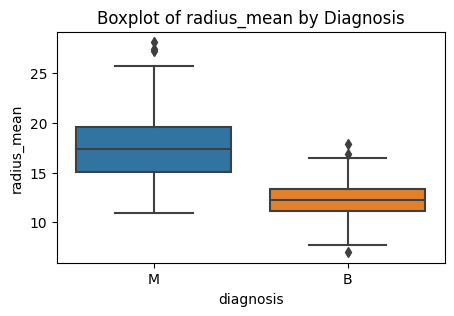

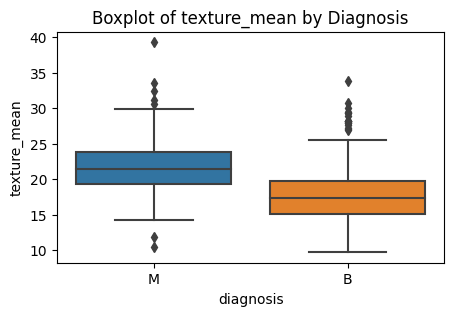

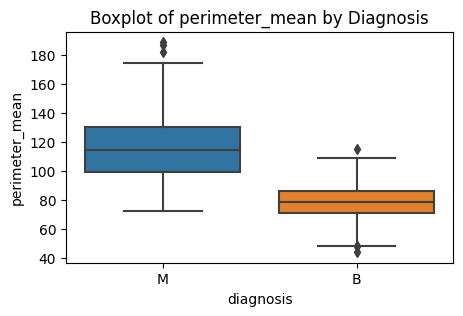

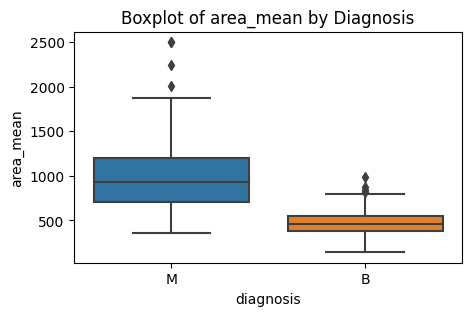

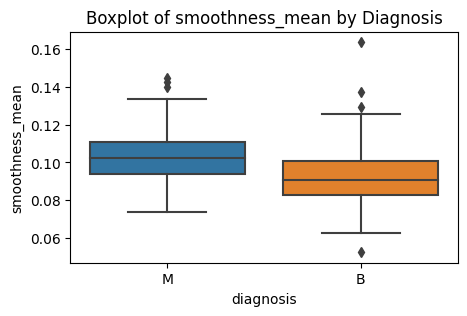

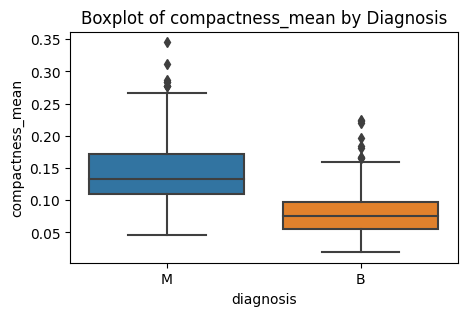

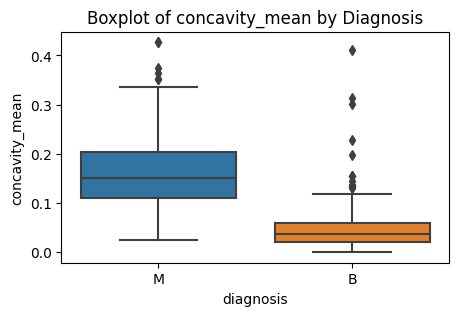

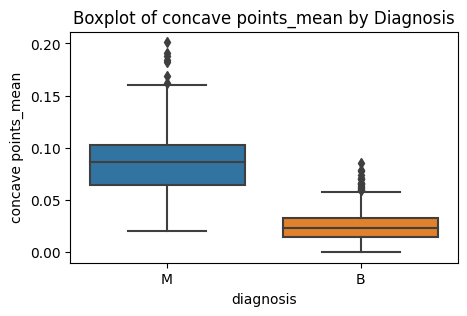

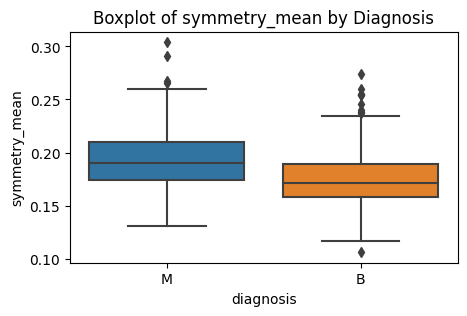

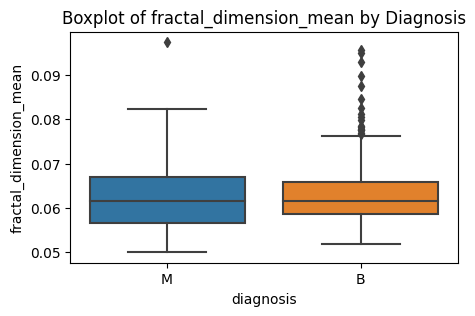

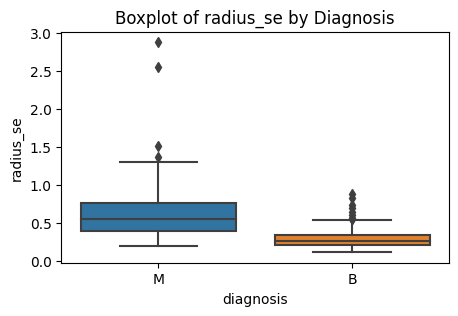

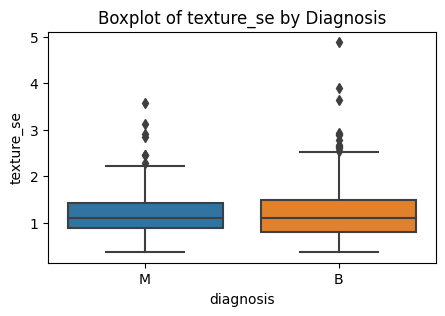

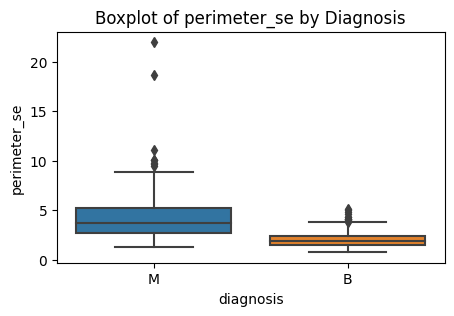

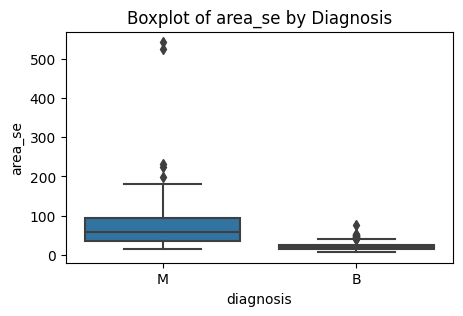

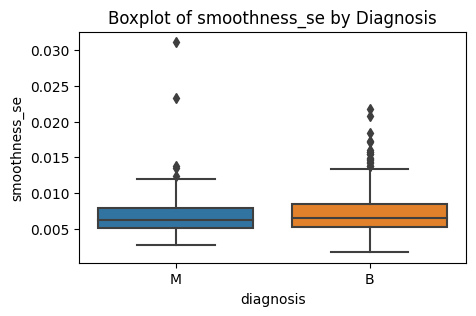

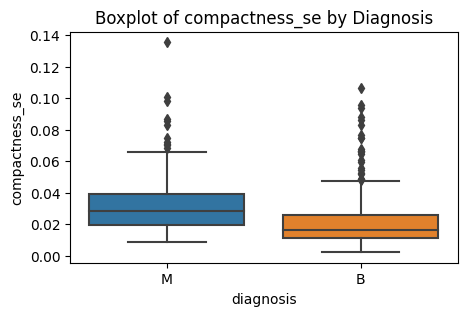

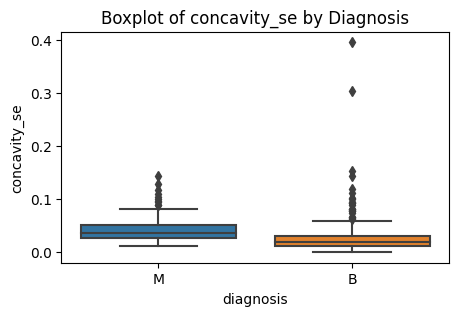

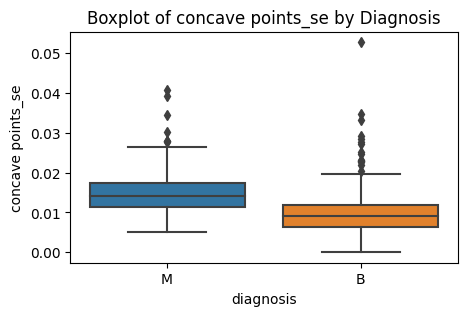

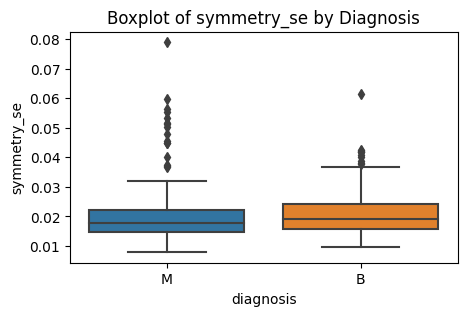

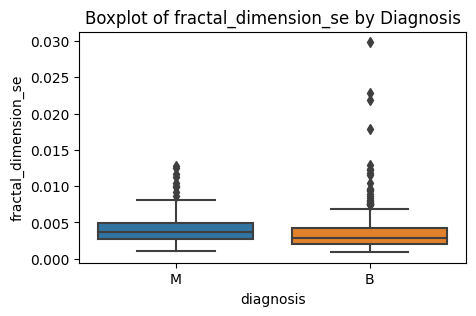

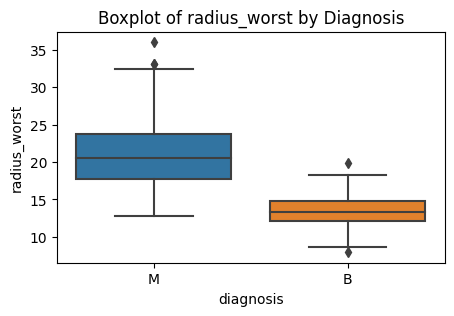

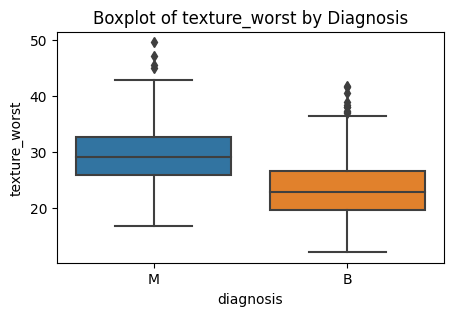

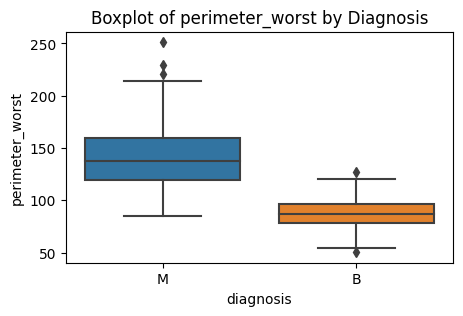

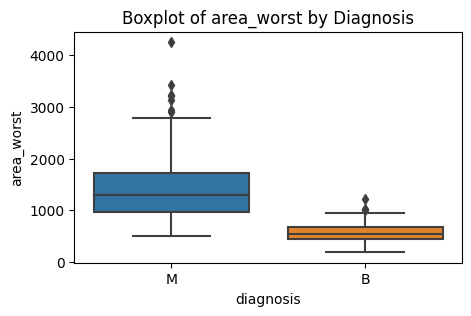

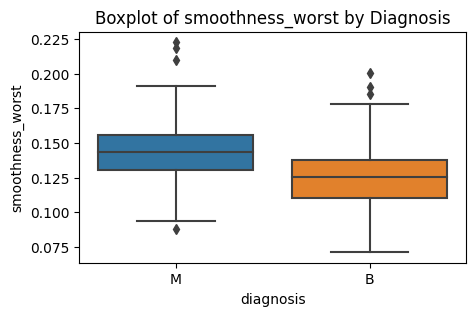

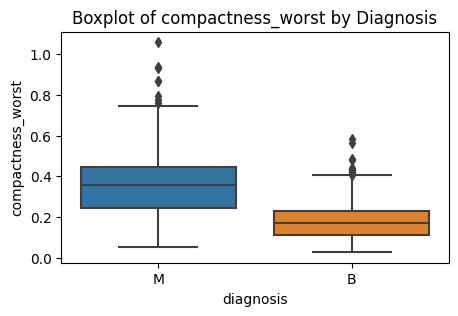

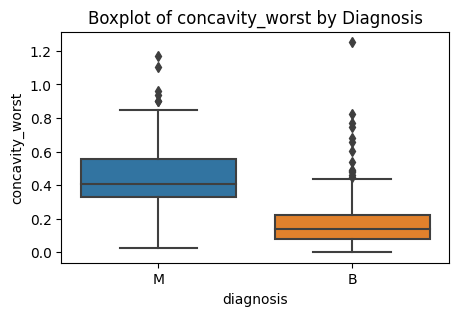

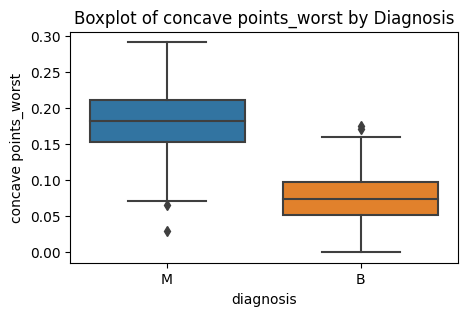

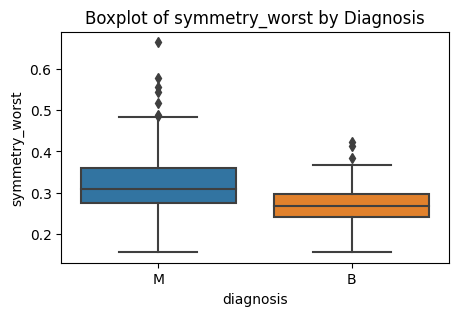

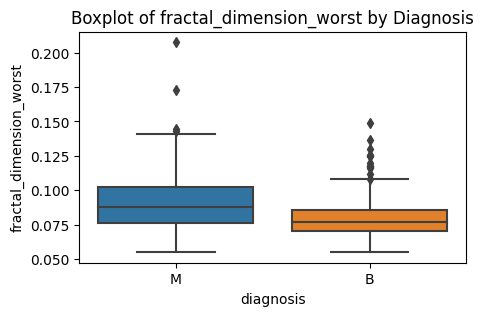

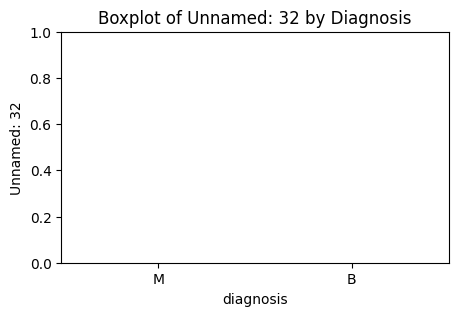

In [14]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in num_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='diagnosis', y=column, data=df)
    plt.title(f'Boxplot of {column} by Diagnosis')
    plt.show()

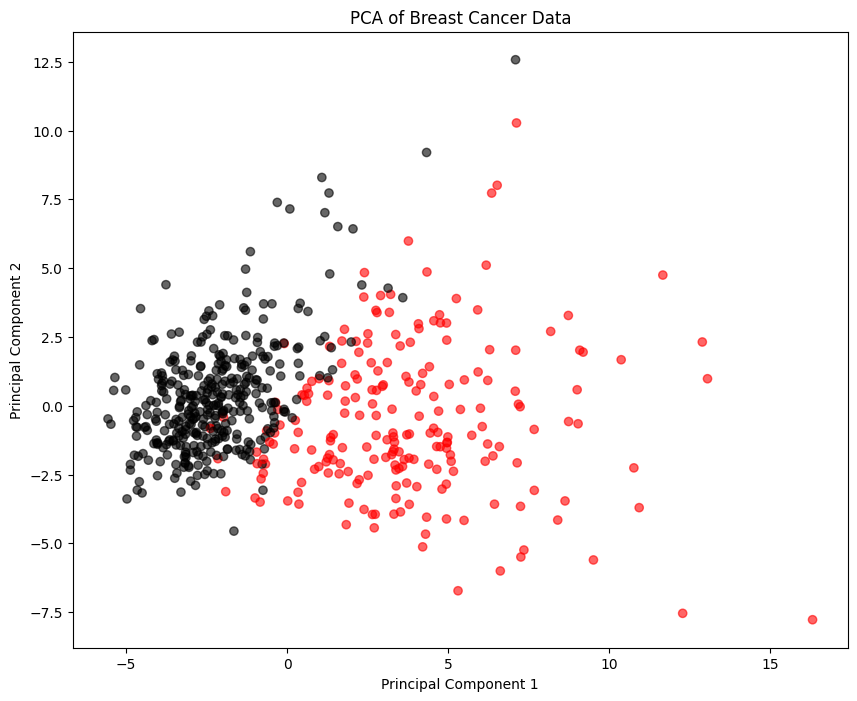

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Exclude 'id', 'Unnamed: 32', and 'diagnosis' columns
df_pca = df.drop(columns=['id', 'Unnamed: 32', 'diagnosis'])

# Standardize the features
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(df_pca_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the diagnosis column back for labeling
pca_df['diagnosis'] = df['diagnosis'].map({'M': 'M', 'B': 'B'})

# Plot the PCA result
plt.figure(figsize=(10, 8))
colors = ['red' if label == 'M' else 'black' for label in pca_df['diagnosis']]
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Data')
plt.show()

In [16]:
pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [17]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

# model selection / testing / training

In [18]:
# Separate the target variable (y) and the features (X)
X = df.drop(columns=['diagnosis', 'Unnamed: 32', 'id']) 
y = df['diagnosis']

In [19]:
y = y.map({'M': 1, 'B': 0})

In [20]:
from sklearn.model_selection import train_test_split

# Step 1: Split into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Split temp (30%) into test (15%) and hold-out (15%)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [21]:
# Verification of sizes
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')
print(f'Hold-out set: {X_holdout.shape}, {y_holdout.shape}')

Training set: (398, 30), (398,)
Test set: (85, 30), (85,)
Hold-out set: (86, 30), (86,)


## random forest

In [22]:
from imblearn.pipeline import Pipeline  # Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 1: Split the data into training, test, and hold-out sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 2: Create a pipeline with SMOTE, scaling, and a classifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', RandomForestClassifier(random_state=42))  # Use Random Forest classifier
])

# Step 3: Train the model using cross-validation and predict on the test set
y_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

# Step 4: Evaluate the model on the test set
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)

# Calculate the metrics
auc_score = roc_auc_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label=1)  # pos_label=1 for 'M'
recall = recall_score(y_test, y_test_pred, pos_label=1)
f1 = f1_score(y_test, y_test_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the metrics
print(f'AUC: {auc_score:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['B', 'M']))

AUC: 0.96
Precision: 0.97
Recall: 0.94
F1-Score: 0.95

Confusion Matrix:
[[52  1]
 [ 2 30]]

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.98      0.97        53
           M       0.97      0.94      0.95        32

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



In [23]:
# Final Step: Evaluate on the hold-out set
y_holdout_pred = pipeline.predict(X_holdout)
holdout_auc = roc_auc_score(y_holdout, y_holdout_pred)
holdout_precision = precision_score(y_holdout, y_holdout_pred, pos_label=1)
holdout_recall = recall_score(y_holdout, y_holdout_pred, pos_label=1)
holdout_f1 = f1_score(y_holdout, y_holdout_pred, pos_label=1)
holdout_conf_matrix = confusion_matrix(y_holdout, y_holdout_pred)

print("\nHold-Out Set Evaluation:")
print(f'AUC: {holdout_auc:.2f}')
print(f'Precision: {holdout_precision:.2f}')
print(f'Recall: {holdout_recall:.2f}')
print(f'F1-Score: {holdout_f1:.2f}')
print('\nConfusion Matrix:')
print(holdout_conf_matrix)


Hold-Out Set Evaluation:
AUC: 0.98
Precision: 1.00
Recall: 0.97
F1-Score: 0.98

Confusion Matrix:
[[54  0]
 [ 1 31]]


Hyperparameter tunning may improve the false negative predictions. In the hand out data set the model predicted 1 instance as "Benign" (B) when it was actually "Malignant" (M). A false negative is a critical error in this context because it means the model failed to identify a cancerous (M) patient, potentially missing a diagnosis.

## multilayer peceptron. feed forward nn

In [24]:
import numpy as np
import tensorflow as tf

2024-08-19 12:26:42.703049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 12:26:42.703198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 12:26:42.845084: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# Step 2: Build the Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the best weights obtained during training
)

# Step 3: Train the Neural Network with Early Stopping
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,  # Set a high number of epochs, early stopping will prevent overfitting
    batch_size=32,
    callbacks=[early_stopping],  # Include early stopping in the training process
    verbose=1
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6010 - loss: 0.6469 - val_accuracy: 0.9000 - val_loss: 0.4327
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9318 - loss: 0.4175 - val_accuracy: 0.9125 - val_loss: 0.3163
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9439 - loss: 0.2952 - val_accuracy: 0.9125 - val_loss: 0.2470
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9598 - loss: 0.1779 - val_accuracy: 0.9125 - val_loss: 0.2072
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9612 - loss: 0.1496 - val_accuracy: 0.9375 - val_loss: 0.1891
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9832 - loss: 0.0952 - val_accuracy: 0.9500 - val_loss: 0.1831
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9680 - loss: 0.0848 - val_accuracy: 0.9375 - val_loss: 0.1843
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9882 - loss: 0.0603 - val_accuracy: 0.9375 - 

In [27]:
# Step 4: Evaluate the Model on the Test Set
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Calculate the metrics
auc_score = roc_auc_score(y_test, y_test_pred_prob)
precision = precision_score(y_test, y_test_pred, pos_label=1)  # pos_label=1 for 'M'
recall = recall_score(y_test, y_test_pred, pos_label=1)
f1 = f1_score(y_test, y_test_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the metrics
print(f'AUC: {auc_score:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['B', 'M']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
AUC: 1.00
Precision: 0.97
Recall: 0.94
F1-Score: 0.95

Confusion Matrix:
[[52  1]
 [ 2 30]]

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.98      0.97        53
           M       0.97      0.94      0.95        32

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



In [28]:
# Final Step: Evaluate on the Hold-Out Set
y_holdout_pred_prob = model.predict(X_holdout)
y_holdout_pred = (y_holdout_pred_prob > 0.5).astype(int)

holdout_auc = roc_auc_score(y_holdout, y_holdout_pred_prob)
holdout_precision = precision_score(y_holdout, y_holdout_pred, pos_label=1)
holdout_recall = recall_score(y_holdout, y_holdout_pred, pos_label=1)
holdout_f1 = f1_score(y_holdout, y_holdout_pred, pos_label=1)
holdout_conf_matrix = confusion_matrix(y_holdout, y_holdout_pred)

print("\nHold-Out Set Evaluation:")
print(f'AUC: {holdout_auc:.2f}')
print(f'Precision: {holdout_precision:.2f}')
print(f'Recall: {holdout_recall:.2f}')
print(f'F1-Score: {holdout_f1:.2f}')
print('\nConfusion Matrix:')
print(holdout_conf_matrix)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Hold-Out Set Evaluation:
AUC: 1.00
Precision: 1.00
Recall: 0.91
F1-Score: 0.95

Confusion Matrix:
[[54  0]
 [ 3 29]]
